In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('diabetes2.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [6]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

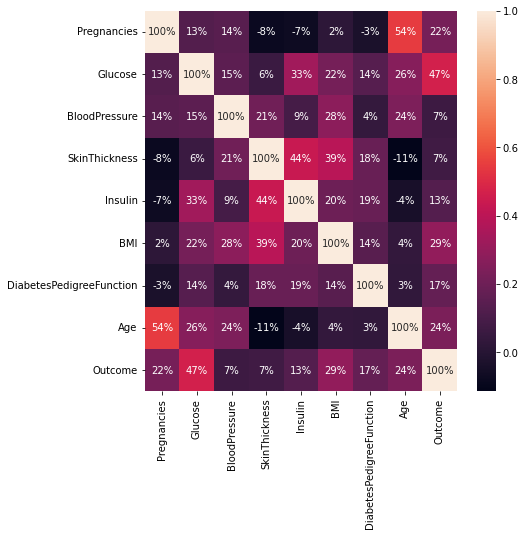

In [7]:
#correlation plot using my new dataframe
plt.figure(figsize=[7,7])
sns.heatmap(dataset.corr(), annot= True, fmt= '.0%')

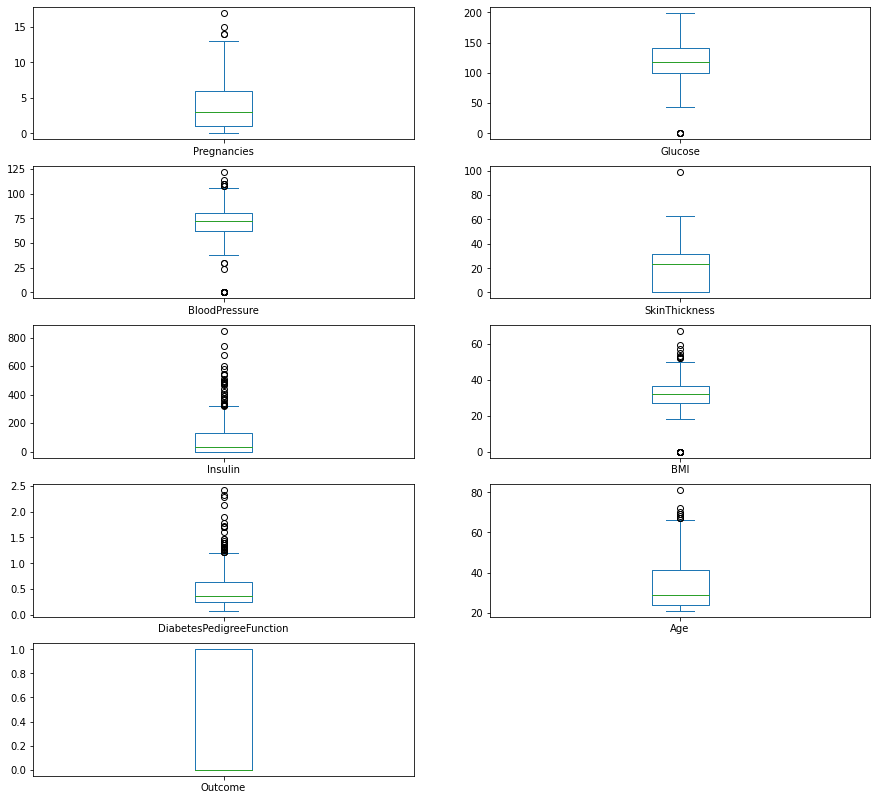

In [8]:
dataset.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [9]:
X=dataset[dataset.columns]
X=X.drop(columns=['Outcome','Pregnancies','SkinThickness','DiabetesPedigreeFunction'])
X.head()

,Glucose,BloodPressure,Insulin,BMI,Age
0,148,72,0,33.6,50
1,85,66,0,26.6,31
2,183,64,0,23.3,32
3,89,66,94,28.1,21
4,137,40,168,43.1,33


In [10]:
Y=dataset['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [12]:
X_train.shape,X_test.shape

((537, 5), (231, 5))

In [13]:
def model_acc(model):
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    print(str(model)+ '-->'+str(acc))

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
model_acc(nb_clf)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
model_acc(knn_clf)

from sklearn import ensemble
gb_clf = ensemble.GradientBoostingClassifier()
model_acc(gb_clf)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
model_acc(lr_clf)

RandomForestClassifier()-->0.7835497835497836
GaussianNB()-->0.7445887445887446
KNeighborsClassifier()-->0.7272727272727273
GradientBoostingClassifier()-->0.7705627705627706
LogisticRegression()-->0.7662337662337663


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = {'n_estimators':[10, 50,100]}
grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train,Y_train)
best_model = grid_fit.best_estimator_
best_model

RandomForestClassifier()

In [17]:
best_model.score(X_train,Y_train)

1.0

In [18]:
import pickle
with open('Diabetic.pkl','wb') as file:
    pickle.dump(grid_fit, file)

In [19]:
best_model.predict([[148,72,0,33.6,50]])

array([1], dtype=int64)